In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
train_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N


In [4]:
#train_df.info()

In [5]:
test_df.head()

,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,67991,67991,40000.0,0.0819,814.70,MORTGAGE,140000.0,Not Verified,low_risk,n,...,97.7,0.0,0.0,0.0,527975.0,70914.0,74600.0,99475.0,N,N
1,25429,25429,6000.0,0.1524,208.70,RENT,55000.0,Not Verified,low_risk,n,...,66.7,0.0,0.0,0.0,34628.0,23460.0,5900.0,23628.0,N,N
2,38496,38496,3600.0,0.1695,128.27,RENT,42000.0,Not Verified,low_risk,n,...,100.0,0.0,0.0,0.0,23100.0,19183.0,7300.0,15000.0,N,N
3,19667,19667,20000.0,0.1524,478.33,RENT,100000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,56481.0,43817.0,13800.0,35981.0,N,N
4,37505,37505,3600.0,0.1240,120.27,RENT,50000.0,Not Verified,low_risk,n,...,100.0,25.0,0.0,0.0,45977.0,32448.0,21000.0,24977.0,N,N


In [6]:
#test_df.info()

# Convert categorical data to numeric and separate target feature for training data
Create a training set from the 2019 loans using pd.get_dummies() to convert the categorical data to numeric columns. 


In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
X_train = train_df.drop(columns = ["index","loan_status","Unnamed: 0"])
X_train = pd.get_dummies(X_train)
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0


In [8]:
#X_train.info()

In [9]:
y_train = LabelEncoder().fit_transform(train_df["loan_status"])
y_train

array([1, 1, 1, ..., 0, 0, 0])

# Convert categorical data to numeric and separate target feature for testing data and add missing dummy variables to testing set
Similarly, create a testing set from the 2020 loans, also using pd.get_dummies(). Note! There are categories in the 2019 loans that do not exist in the testing set. If you fit a model to the training set and try to score it on the testing set as is, you will get an error. You need to use code to fill in the missing categories in the testing set.

In [10]:
X_test = test_df.drop(columns = ["index","loan_status","Unnamed: 0"])
X_test = pd.get_dummies(X_test)
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,0,1,0,1,1,0,1,0,1
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,0,1,0,1,1,0,1,0,1
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,0,1,0,1,1,0,1,0,1
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,0,1,0,1,1,0,1,0,1
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,0,1,0,1,1,0,1,0,1


In [11]:
#X_test.info()

In [12]:
y_test = LabelEncoder().fit_transform(test_df["loan_status"])
y_test

array([1, 1, 1, ..., 0, 0, 0])

In [13]:
# Add Column to Test
X_train.columns.difference(X_test.columns).tolist()
X_test['debt_settlement_flag_Y'] = 0

In [14]:
X_train.columns.difference(X_test.columns).tolist()

[]

In [15]:
X_test.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,0.0,9471.0,...,0,1,0,1,1,0,1,0,1,0
1,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,0.0,1280.0,...,0,1,0,1,1,0,1,0,1,0
2,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,0.0,4757.0,...,0,1,0,1,1,0,1,0,1,0
3,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,0.0,12731.0,...,0,1,0,1,1,0,1,0,1,0
4,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,0.0,10413.0,...,0,1,0,1,1,0,1,0,1,0


In [16]:
X_train.head()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,0.0,39728.0,...,0,1,0,1,1,0,1,0,1,0
1,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,0.0,9585.0,...,0,1,0,1,1,0,1,0,1,0
2,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,0.0,16708.0,...,0,1,0,1,1,0,1,0,1,0
3,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,1.0,8809.0,...,0,1,0,1,1,0,1,0,1,0
4,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,0.0,65420.0,...,0,1,0,1,1,0,1,0,1,0


# Fit a LogisticRegression model and RandomForestClassifier model¶
Train the Logistic Regression model on the unscaled data and print the model score

# Prediction: I believe the Random Forest Classifier will work better as it will reduce overfitting

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=42)
classifier
classifier.fit(X_train, y_train)
print(f"Logistic Regression Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Logistic Regression Testing Data Score: {classifier.score(X_test, y_test)}")

Logistic Regression Training Data Score: 0.6509031198686371
Logistic Regression Testing Data Score: 0.5163760102084219


C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train a Random Forest Classifier model and print the model score

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=250).fit(X_train, y_train)
print(f'Random Forest Classifier Training Score: {clf.score(X_train, y_train)}')
print(f'Random Forest Classifier Testing Score: {clf.score(X_test, y_test)}')

Random Forest Classifier Training Score: 1.0
Random Forest Classifier Testing Score: 0.6465333900467886


## Initial Results
The Random Forest Classifier performed better than the Logistic Regression model, but the testing scores were low. 
The Logistic Regression model's Training Data Score was: 0.6509031198686371, and Testing Data Score was: 0.5163760102084219. 
The Random Forest Classifier's Training Data Score was: 1.0, and Testing Data Score was: 0.6465333900467886

# Scale the data
The data going into these models was never scaled, an important step in preprocessing. Use StandardScaler to scale the training and testing sets. Before re-fitting the LogisticRegression and RandomForestClassifier models on the scaled data, make another prediction about how you think scaling will affect the accuracy of the models. Write your predictions down and provide justification.

Fit and score the LogisticRegression and RandomForestClassifier models on the scaled data. How do the model scores compare to each other, and to the previous results on unscaled data? How does this compare to your prediction? Write down your results and thoughts.

In [19]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model on the scaled data and print the model score

In [26]:
classifier.fit(X_train_scaled, y_train)
print(f"Scaled Logistic Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Scaled Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Scaled Logistic Training Data Score: 0.7078817733990148
Scaled Testing Data Score: 0.767333049766057


C:\Users\cbarr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Train a Random Forest Classifier model on the scaled data and print the model score

In [25]:
clf = RandomForestClassifier(random_state=1, n_estimators=250).fit(X_train_scaled, y_train)
print(f'Scaled Random Forest Classifier Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Scaled Random Forest Classifier Testing Score: {clf.score(X_test_scaled, y_test)}')

Scaled Random Forest Classifier Training Score: 1.0
Scaled Random Forest Classifier Testing Score: 0.6471714164185453


## Final Interpretation
The scaled data showed better results, and it seems like the Logistic Regression model showed better testing results than the Random Forest Classifier model.

In [93]:
feature_importances = clf.feature_importances_


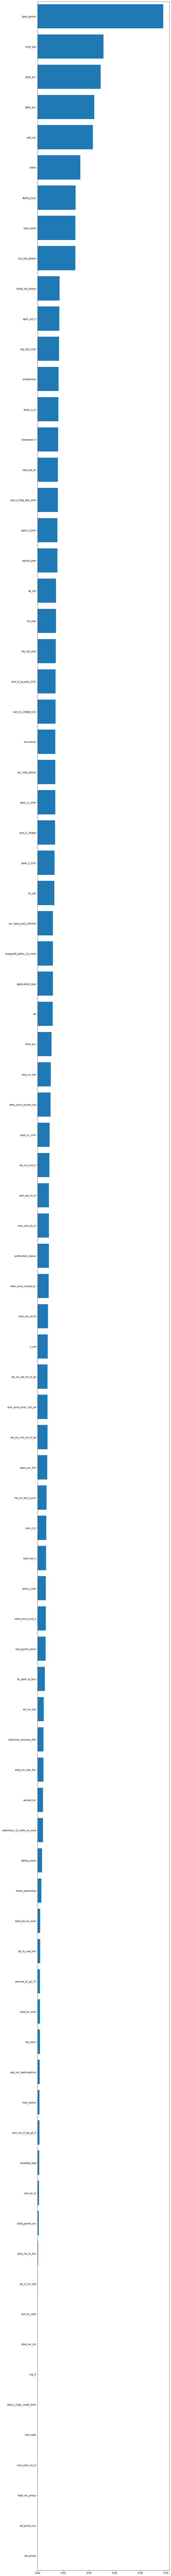

In [106]:
features = sorted(zip(X_test.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

# The top 5 classifiers are "Total Payment, Revolving Balance, Total Accounts, Open Accounts, Public Records"

In [122]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=10).fit(X_test_scaled, y_test_scaled)
print(reg.coef_)
plt.bar(X_test_scaled.columns, reg.coef_)
plt.show()

NameError: name 'y_test_scaled' is not defined